# Prerequisite 
* Load required packages and load images (already uploaded on  blackboard content) in Colab 
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Submit the assignment on Blackboard by March 30, 2021 in **.ipynb** format.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook. 
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY following opencv functions for any type of opencv operations**

>[cv.imread](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56),
>[cv.filter2D](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04), 
>[cv.cvtColor](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab), 
>[cv.getGaussianKernel](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa), 
>[cv.getDerivKernels](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga6d6c23f7bd3f5836c31cfae994fc4aea),
>[cv.erode](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb),
>[cv.dilate](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c),
>[cv.GaussianBlur](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1),
>[cv.Laplacian](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6),
> [all core operations](https://docs.opencv.org/3.4/d2/de8/group__core__array.html) {e.g. Matrix Addition, Subtraction, Multiplication, Inverse, Finding Min-Max in Matrix, Element-wise Power of Matrix, and much more...}

* Total Marks: **[100 Points]**
*_Final Marks will be scaled according to weightage in final course grading_


# New Section

# Q1) Display following stages


In [3]:
#standard imports for image processing

import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [4]:
#defining some utils for processing

plt.rcParams["figure.figsize"] = (5,10)
plt.rcParams["figure.edgecolor"] = "black"
plt.rcParams["lines.linewidth"] = 1

def scale(a,sf=255,delta=0):
    return ((a - np.min(a)+delta) * (sf / (np.abs(np.min(a)) + np.abs(np.max(a)+delta)))).astype(np.uint8)

def plot(img,title=""):
    plt.imshow(img,cmap='gray',vmin=0,vmax=255)
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.show()
  
def plot_mult(img,title):
    plt.imshow(img,cmap='gray',vmin=0,vmax=255)
    plt.axis('off')
    plt.title(title)

## a) Load 'A.png'  **[0 Points]**

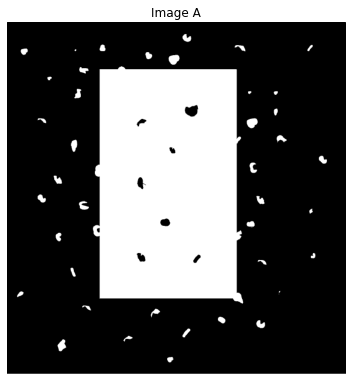

In [5]:
#loading image A

img = cv2.imread('A.png',cv2.IMREAD_GRAYSCALE)
plot(img,'Image A')

##b) Define and display $20\times20$ rectangular structuring element **[5 Points]**

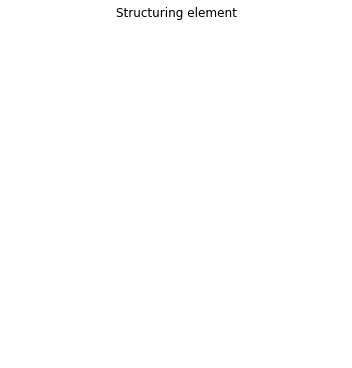

In [6]:
#took a standard structuring element filled with 255
structure_element = 255*np.ones((20, 20)).astype(np.uint8)
plot(structure_element,'Structuring element')

##c) Erode a) with b) **[5 Points]**

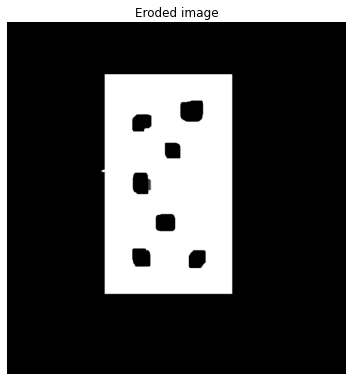

In [7]:
#eroding a with b
eroded = cv2.erode(img,kernel=structure_element)
plot(eroded,'Eroded image')

##d) dilate c) with b) two times **[5 Points]**

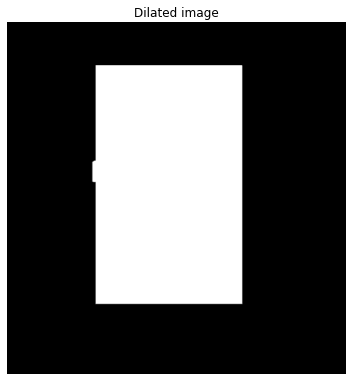

In [8]:
#dilating c with b two times using cv2.dilate
dilate2 = cv2.dilate(eroded,structure_element,iterations = 2)
plot(dilate2,'Dilated image')

##e) erode d) with b) three times **[5 Points]**

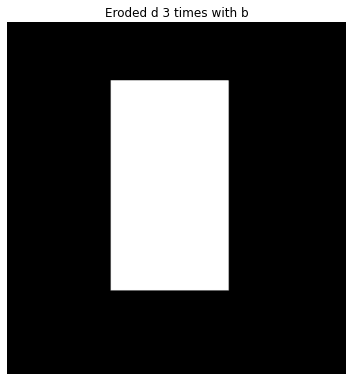

In [9]:
#eroding d with b 3 times
erode_dilate = cv2.erode(dilate2,structure_element,iterations = 3)

plot(erode_dilate,'Eroded d 3 times with b')

##f) xor a) with e) **[5 Points]**

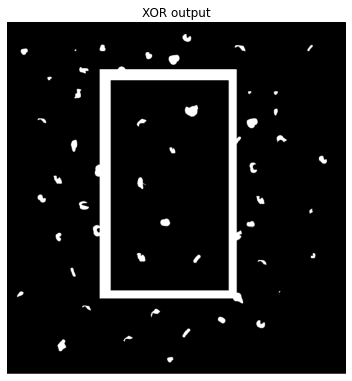

In [10]:
#using bitwise xor b/w a and e

xor = cv2.bitwise_xor(img,erode_dilate)
plot(xor,'XOR output')


##g) Explain morphological shifting. Shift e) in such a way, after xor with a) rectangle disappears from a). Display final image. **[25 Points]**



# **Definition**

### "*Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images*"


# **Process**
*   A Binary Image is taken as input.(can be obtained from Thresholding/segmentation)
*   using a **"structuring element"** 
apply filters for process like dilation,erosion,opening .etc (or can be any logical opertaion)
*   resulting image output is binary aswell.








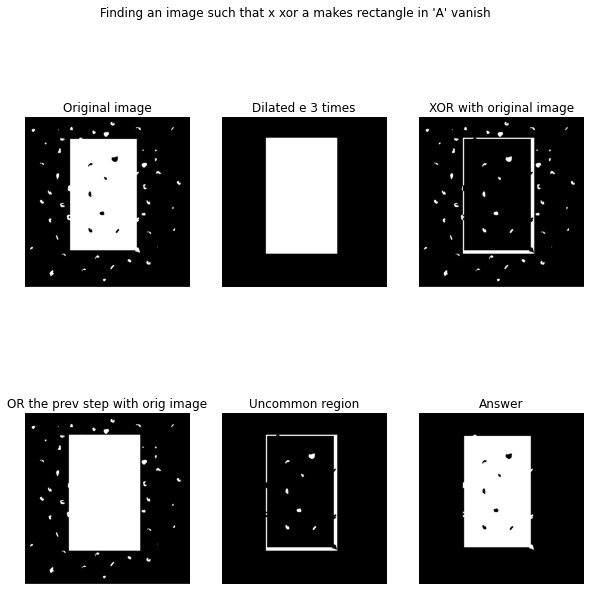

In [15]:
# How I got the solution:
# I noticed that the rectange part of the image got eroded and dilated a couple 
# of times thus forming a little edge over the actual rectangle and therefore 
# doing xor with the image leads to a small rectangular frame .
# I tried to mimic the reversal and found the extra pixels that got added during 
# the process. Thus all left to do is do a simple xor with the dilated image 
# and we can find the "actual" rectangle to be used for xor with orig image.
# I have mentioned explanation for each step in the process below.


e_d3 = cv2.dilate(erode_dilate,structure_element,iterations = 3)                #dilating e 3 times

xor1 = cv2.bitwise_xor(e_d3,img)                                                #bitwise xor with the dilated result.

or1 = cv2.bitwise_or(img,e_d3)                                                  #or the result with original image.
xor2 = cv2.bitwise_xor(img,or1)                                                 #the "extra" region added during the process
answer = cv2.bitwise_xor(e_d3,xor2)                                             #doing xor with the dilated image to remove that edge and thus forming the exact rectangle that can be used.

final = cv2.bitwise_xor(answer,img)                                             #finally doing xor b/w answer and the image to remove the rectangle


#ploting images


plt.rcParams["figure.figsize"] = (10,10)

plt.suptitle("Finding an image such that x xor a makes rectangle in 'A' vanish")

plt.subplot(2,3,1)
plot_mult(img,"Original image")

plt.subplot(2,3,2)
plot_mult(e_d3,"Dilated e 3 times")

plt.subplot(2,3,3)
plot_mult(xor1,"XOR with original image")

plt.subplot(2,3,4)
plot_mult(or1,"OR the prev step with orig image")

plt.subplot(2,3,5)
plot_mult(xor2,"Uncommon region")

plt.subplot(2,3,6)
plot_mult(answer,"Answer")

plt.rcParams["figure.figsize"] = (5,5)



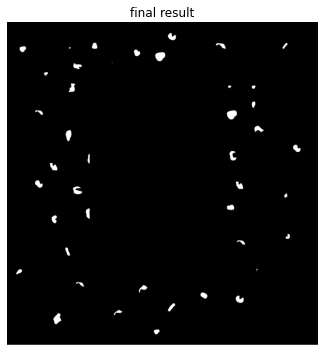

In [12]:
plot(final,"Final result")                                                      #final result

# Q2) Remove 'T' from 'UTK.tif' using structuring element in 'T.tif'. Display and explain final output. **[50 Points]**

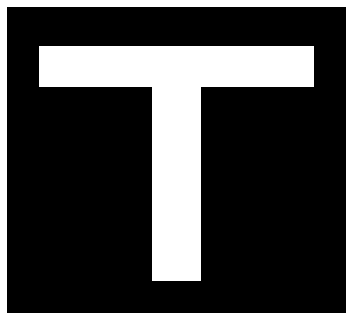

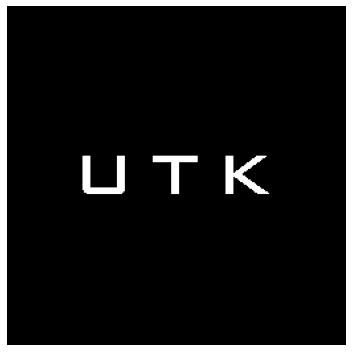

In [13]:

load_img = lambda loc:cv2.threshold(cv2.imread(loc,cv2.IMREAD_GRAYSCALE),254,255,cv2.THRESH_TOZERO)[1]

T = load_img('T.tif')
UTK = load_img('UTK.tif')

plot(T);plot(UTK)


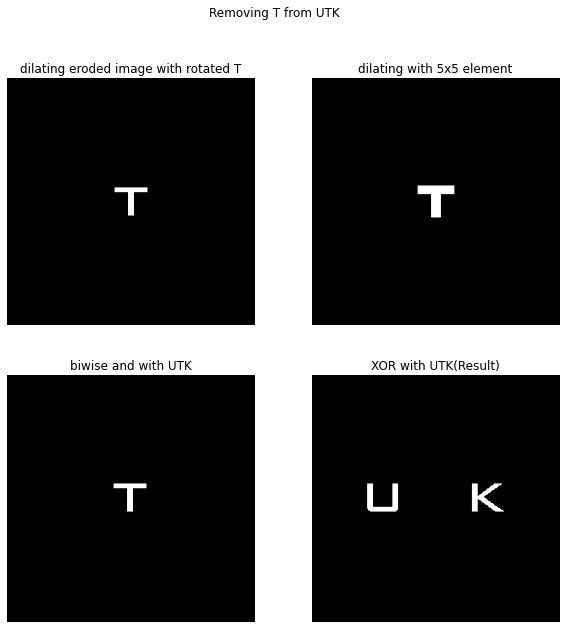

In [14]:
# (cx,cy) = np.unravel_index(np.argmax(center_img),shape = center_img.shape)

# center_filter = np.zeros(UTK.shape,dtype=np.uint8)
# (tx,ty) = (int(T.shape[0]/2),int(T.shape[1]/2))

# center_filter[cx-tx:cx+tx,cy-ty:cy+ty] = T
# result = cv2.bitwise_xor(center_filter,UTK)

                                                                                #applying T filter on the UTK image
center_img = cv2.erode(UTK,T)                                                   #gets the center point

T = np.rot90(T,2)                                                               #cv2 implements a version where the kernel gets rotated 180degrees so I rotated it back.


dilated_img_T = cv2.dilate(center_img,T,iterations = 1)                         #produces a T shape right from where it got removed
dilated_img = cv2.dilate(dilated_img_T,np.ones((5,5)))                          #dilating it a little bit so the it wont miss any edges (the )
and_img = cv2.bitwise_and(dilated_img,UTK)                                      #the T shape filtered out of image
result = cv2.bitwise_xor(and_img,UTK)                                           #using the result obtained from previous step to xor and remove T from UTK



#plot

plt.rcParams["figure.figsize"] = (10,10)

plt.suptitle("Removing T from UTK")

plt.subplot(2,2,1)
plot_mult(dilated_img_T,"dilating eroded image with rotated T")

plt.subplot(2,2,2)
plot_mult(dilated_img,"dilating with 5x5 element")

plt.subplot(2,2,3)
plot_mult(and_img,"biwise and with UTK")

plt.subplot(2,2,4)
plot_mult(result,"XOR with UTK(Result)")


# **Explanation**




1.   Eroded the original image with the 'T' filter.
2.   after erosion dilated the result with the rotated T filter.


> Reason for rotating:
  OpenCV algorithm for dilating convolves the shape producing some undesirable effects which can be countered by manually rotating the filter by 180.




3.   Filtered out the T from UTK
4.   Finally a xor to remove T from UTK




